# データ解析特論 2022年度水曜２限

# 第4回 その1 多項式回帰

In [1]:
# ライブラリ
import numpy as np
import matplotlib.pyplot as plt


## 多項式回帰とは

多項式回帰は説明変数 $x$ 1つの場合に，$x$ による単回帰ではなく，$x$, $x^2$, $x^3$ など，$x$ のべき乘の功を回帰変数に用いる手法で，

$$
y = a_0 + a_1 x + a_2 x^2 + \ldots + a_m x^m + \xi = \sum_{j=0}^M a_j x^j + \xi
$$

というモデルを当てはめる方法である．多項式回帰モデルは，回帰変数を $x_j = x^j$ とした重回帰モデルであると言える．

データに対して単回帰を用いて直線を当てはめるのが不適切とわかる場合に用いられる．

ここで

- $y$ は目的変数（データとして与えられるもの）
- $x^j \ (j=0, 1, 2, \ldots, M)$ を説明変数と取る（データとして与えられるもの）
- $a_j \ (j=0, 1, 2, \ldots, M)$ は回帰係数（データから求めるもの）
- $\xi$ はノイズ（モデルでは当てはめられないランダムな要因）

以下，特に注意しない限り__データは実数値__とする．

In [57]:
# 真のパラメータ
A0 = 1.5
A1 = -0.5
A2 = 0.5

# dataset
X = np.arange(0, 3.1, 0.3)
Y = A0 + A1*X + A2*X**2 + 2.0*(np.random.rand(X.size)-0.5)

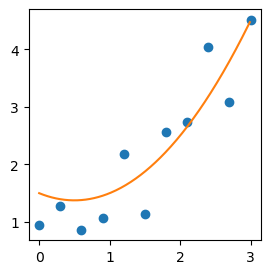

In [58]:
# 回帰直線と二乗誤差のプロット用関数
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(X, Y)
Xplot = np.arange(0, 3, 0.01)
Yplot = A0 + A1*Xplot + A2*Xplot**2
ax.plot(Xplot, Yplot, c='tab:orange')

In [ ]:
# ipywidgets.interact を用いてパラメータを逐次変えて描画


# 青点がデータ点
# 赤が回帰直線
# MSE = Mean Squared Error = 平均二乗誤差

# 必ずしも真のパラメータのときに平均二乗誤差最小になるわけではないことに注意しよう

直線でのフィッティングでは適切なモデルとは言えない．多項式フィッティングを考えよう．

### 多項式フィッティング

回帰変数2つの重回帰では，データ空間 $(x_1, x_2, y)$ の3次元空間に回帰平面を引き，データから平面までの高さの二乗和が最小になるように選ぶ．

In [ ]:
# 真のパラメータ


# dataset



In [20]:
# フィッティングに用いる多項式の最大次数
M = 2
# 多項式回帰変数の設定
XX = np.ones((X.size, M+1))
for i in range(1, M+1):
    XX[:, i] = X**i
XX

array([[1.  , 0.  , 0.  ],
       [1.  , 0.3 , 0.09],
       [1.  , 0.6 , 0.36],
       [1.  , 0.9 , 0.81],
       [1.  , 1.2 , 1.44],
       [1.  , 1.5 , 2.25],
       [1.  , 1.8 , 3.24],
       [1.  , 2.1 , 4.41],
       [1.  , 2.4 , 5.76],
       [1.  , 2.7 , 7.29],
       [1.  , 3.  , 9.  ]])

In [23]:
# 多項式回帰変数を sklearn を用いて作ることもできる
from sklearn.preprocessing import PolynomialFeatures
polyX = PolynomialFeatures(degree=2)
polyX.fit_transform(X.reshape(-1, 1))

array([[1.  , 0.  , 0.  ],
       [1.  , 0.3 , 0.09],
       [1.  , 0.6 , 0.36],
       [1.  , 0.9 , 0.81],
       [1.  , 1.2 , 1.44],
       [1.  , 1.5 , 2.25],
       [1.  , 1.8 , 3.24],
       [1.  , 2.1 , 4.41],
       [1.  , 2.4 , 5.76],
       [1.  , 2.7 , 7.29],
       [1.  , 3.  , 9.  ]])

In [32]:
XX.shape, AA.shape, Ypred.shape

((11, 3), (3,), (11,))

[ 1.4761022  -0.44195098  0.49570943]


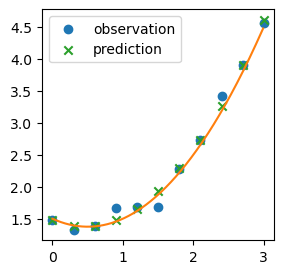

In [35]:
# (XX.T@XX)@A = XX.T@Y
GG = XX.T@XX
BB = XX.T@Y
AA = np.linalg.solve(GG, BB) # solve linear problem GG*AA = BB
print(AA)
Ypred = XX@AA
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(X, Y, label='observation')
ax.scatter(X, Ypred, c='tab:green', label='prediction', marker='x')
ax.plot(Xplot, Yplot, c='tab:orange')
ax.legend()

7.993605777301127e-15
1.476102203469563 [-0.44195098  0.49570943]
-7.993605777301127e-15 [ 1.70419234e-14 -5.44009282e-15]


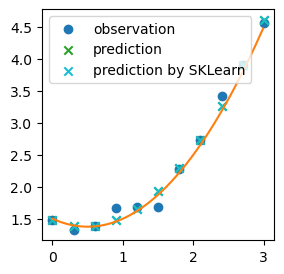

In [46]:
# regressor の設定と学習
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
YpredS = reg.fit(XX[:, 1:], Y).predict(XX[:, 1:])
# 学習データの予測値を出力
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(X, Y, label='observation')
ax.scatter(X, Ypred, c='tab:green', label='prediction', marker='x')
ax.scatter(X, YpredS, c='tab:cyan', label='prediction by SKLearn', marker='x')
ax.plot(Xplot, Yplot, c='tab:orange')
ax.legend()
print(np.max(np.abs(Ypred - YpredS)))
# 回帰係数の表示
print(reg.intercept_, reg.coef_)
print(AA[0]-reg.intercept_, AA[1:3]-reg.coef_)

2次関数でうまくフィッティングができている．

しかし，フィッティングに用いる多項式の次数を増やすと MSE をもっと下げることができる．

In [70]:
# 多項式回帰のプロット
def plot_polynomialregression(M=2):
    # dataset
    XX = np.ones((X.size, M+1))
    for i in range(1, M+1):
        XX[:, i] = X**i
    # sklearn
    reg = LinearRegression(fit_intercept=False)
    YpredS = reg.fit(XX, Y).predict(XX)
    AA = reg.coef_
    
    Ypredplot = AA[0] * np.ones(Xplot.size)
    for i in range(1, M+1):
        Ypredplot += AA[i]*Xplot**i
    
    MSE = np.mean((Y-YpredS)**2)
    # visualization
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.scatter(X, Y, label='observation', c='tab:green')
    ax.scatter(X, YpredS, c='tab:cyan', label='prediction by SKLearn', marker='x')
    ax.plot(Xplot, Yplot, c='tab:orange')
    ax.plot(Xplot, Ypredplot, c='tab:cyan')
    ax.set_title('M = %d, MSE = %f'%(M, MSE))
    ax.legend()

In [71]:
# ipywidgets.interact を用いてパラメータを逐次変えて描画
from ipywidgets import interact
interact(plot_polynomialregression, M=(1, 20, 1))

interactive(children=(IntSlider(value=2, description='M', max=20, min=1), Output()), _dom_classes=('widget-int…

<function __main__.plot_polynomialregression(M=2)>

多項式の次数をデータ数と比べて十分高く取ると，全ての点を通るような多項式曲線を描くことができる．この時はデータ点に対する回帰誤差は必ずゼロとなる．

MSE だけを減らせば良いというわけではないことがわかる．

このことを一般に過学習 (overfitting) という．回帰変数を増やせば，すなわちモデルを複雑にすれば MSE をいくらでも下げることができる一つの例である．

過学習となっている場合は，学習データ近傍であっても回帰曲線は正しい推定値を与えない．推定誤差が低くなってしまう．このことを確かめるために同じ分布に従う別なデータセットを取って確かめてみよう．

In [82]:
# テスト用 dataset
Xtest = np.random.rand(10)*3 # uniform dist on [0, 3]
Ytest = A0 + A1*Xtest + A2*Xtest**2 + 2.0*(np.random.rand(Xtest.size)-0.5)

In [83]:
# 多項式回帰とテストデータの比較
def plot_polynomialregression_fortestdata(M=2):
    ### learning ###
    XX = np.ones((X.size, M+1))
    XXtest = np.ones((Xtest.size, M+1))
    XXplot = np.ones((Xplot.size, M+1))
    for i in range(1, M+1):
        XX[:, i] = X**i
        XXtest[:, i] = Xtest**i
        XXplot[:, i] = Xplot**i
    # sklearn
    reg = LinearRegression(fit_intercept=False)
    Ytestpred = reg.fit(XX, Y).predict(XXtest)
    Ypredplot = reg.predict(XXplot)
    MSE = np.mean((Ytest-Ytestpred)**2)
    # visualization
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.scatter(Xtest, Ytest, label='test data', c='tab:green')
    ax.scatter(Xtest, Ytestpred, c='tab:cyan', label='prediction for test data', marker='x')
    ax.plot(Xplot, Yplot, c='tab:orange')
    ax.plot(Xplot, Ypredplot, c='tab:cyan')
    ax.set_title('M = %d, MSE = %f'%(M, MSE))
    ax.legend()

In [84]:
# ipywidgets.interact を用いてパラメータを逐次変えて描画
interact(plot_polynomialregression_fortestdata, M=(1, 20, 1))

interactive(children=(IntSlider(value=2, description='M', max=20, min=1), Output()), _dom_classes=('widget-int…

<function __main__.plot_polynomialregression_fortestdata(M=2)>

テストデータに対する MSE は次数を上げるにつれて大きくなることがわかる．

学習で得られたモデルをテストデータに適用して得られた回帰誤差を汎化誤差と呼ぶ．

一方，学習時の回帰誤差を学習誤差と呼ぶ．

学習誤差は多項式の次数を上げることでいくらでも下げられるが，汎化誤差はそうとは限らない．汎化誤差も小さいモデルが良いモデルであると言える．

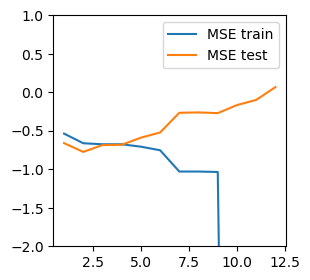

In [90]:
# 多項式の次数の最大値
Mmax = 12
# MSE の配列
MSEtrains = np.zeros(Mmax+1)
MSEtests = np.zeros(Mmax+1)

# M を変えて多項式回帰
for M in range(1, Mmax+1):
    ### learning ###
    XX = np.ones((X.size, M+1))
    XXtest = np.ones((Xtest.size, M+1))
    for i in range(1, M+1):
        XX[:, i] = X**i
        XXtest[:, i] = Xtest**i
    # sklearn
    reg = LinearRegression(fit_intercept=False)
    Ytestpred = reg.fit(XX, Y).predict(XXtest) # prediction for test data
    Ypred = reg.predict(XX) # prediction for training data
    MSEtests[M] = np.mean((Ytest-Ytestpred)**2)
    MSEtrains[M] = np.mean((Y-Ypred)**2)

# MSE のプロット
fig, ax = plt.subplots(figsize=(3, 3))
ax.plot(np.arange(1, Mmax+1), np.log10(MSEtrains[1:]), label='MSE train')
ax.plot(np.arange(1, Mmax+1), np.log10(MSEtests[1:]), label='MSE test')
ax.set_ylim(-2, 1)
ax.legend()

汎化誤差が最小になる次数を取ることで，過学習を防ぐことができる．

# 演習問題 4-1

第3回その3で Iris データセットに対して，あらゆる変数の組み合わせについて線形回帰モデルを試した．

では，目的変数と説明変数を1つずつ取り，その組み合わせを取り替えて多項式回帰モデルを試し，多項式次数とフィッティング精度に傾向があるか確かめよ．上でやったように多項式次数を十分高く取ると過学習してしまうので，汎化誤差が小さくなるように多項式次数を調整し，学習誤差と汎化誤差の比較も行うこと．

（植物学的に意味があるかはさておき）一番フィッティングの合う多項式回帰モデルは何か．その理由も考えよ．

<h3><div style="text-align: right;">その2につづく</div></h3>